# SHRODINGER 1D : HARMONIC OSCILLATOR

In [1]:
#-----Loading packages--------------

import numpy as np
import scipy.fftpack as fftpack
import matplotlib
import matplotlib.pyplot as plt
import time
import h5py

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#----Harmonic  Potential--------------
mass = 1.
omega = 10.

def Potential(x):
        return 0.5*mass*omega**2*x**2
    
#----Gradient of quartic potencial

def dPotentialdx(x):  
    return mass*omega**2*x

In [3]:
#----Parameters in atomic units-----

X_gridDIM    =  1024        # Discretization grid size in X 
X_amplitude  =  30         # Window range -X1_amplitude to X1_amplitude
dt           =  0.005       # Time increment
timeSteps    =  1000000        # Number of iterations
hbar         =  1          # Plank constant

#-----Discretization resolution-----

dX =  2.*X_amplitude/float(X_gridDIM)
dK =  2.*np.pi/(2.*X_amplitude)
K_amplitude = dK*X_gridDIM/2.


#-----vectors with range of coordinates-----

timeRange     =  np.array(range(0,timeSteps))*dt 

X_range      =  np.linspace(-X_amplitude      , X_amplitude  -dX , X_gridDIM )
K_range      =  np.linspace(-K_amplitude      , K_amplitude  -dK , X_gridDIM)
X            =  fftpack.fftshift( X_range )
K            =  fftpack.fftshift( K_range )


print ' dX = ',dX,'  dK = ',dK
print ' K_amplitude = ', K_amplitude
print ' dK = ',dK,' must be in most cases not too different from dX/dt =', dX/dt
print 'Time of simulation :', timeSteps*dt,'(a.u.)'

 dX =  0.05859375   dK =  0.10471975512
 K_amplitude =  53.6165146213
 dK =  0.10471975512  must be in most cases not too different from dX/dt = 11.71875
Time of simulation : 5000.0 (a.u.)


## 1. INITIAL STATE GAUSSIAN STATE

In [4]:
#----Initial wave packet in x space ----------------------------
#  x_init  = center of the wave packet
#  s       = standart deviation 

x_init = 1.
k_init = 2.
s = 1.

Psi0_x = np.exp( -0.5  *((X-x_init)/s)**2 + 1j*(K-k_init)*X )


In [5]:
#---Normalization in x space:

norm_x0 = np.sqrt( np.trapz( np.abs(Psi0_x)**2  ,dx=dX ) )
Psi0_x /= norm_x0

#---Normalization in k space:

norm_k0 = np.sqrt( np.trapz( fftpack.fftshift( np.abs(fftpack.fft(Psi0_x))**2  )  ,dx=dK ) )
Psi0_k  = fftpack.fft(Psi0_x)/norm_k0

#---Now if we renormalized  "Phi0_x"  and  "Phi0_k",we can see that both are normalized to  unit

print 'the renormalized initial state norm (Psi_x) is ', \
np.sqrt( np.trapz( np.abs(Psi0_x)**2  ,dx=dX ) )

print 'the renormalized initial state norm (Psi_k )is ', \
np.sqrt( np.trapz( fftpack.fftshift( np.abs(Psi0_k)**2  )  ,dx=dK ) )

the renormalized initial state norm (Psi_x) is  1.0
the renormalized initial state norm (Psi_k )is  1.0


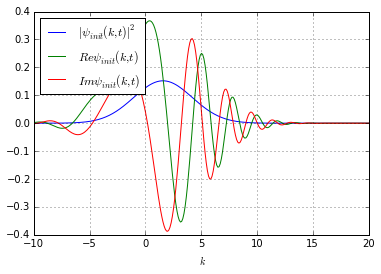

In [37]:
# Plots 
# Initial State in K space
import scipy.fftpack as fftpack
plt.plot( fftpack.fftshift( K ), np.abs( fftpack.fftshift(Psi0_k) )**2 , label ='$|\psi_{init}(k , t)|^2 $')
plt.plot( fftpack.fftshift( K ) , np.real( fftpack.fftshift(Psi0_k) )   , label ='$Re\psi_{init}(k , t) $')
plt.plot( fftpack.fftshift( K ), np.imag( fftpack.fftshift(Psi0_k) )   ,label = '$Im\psi_{init}(k , t)$')
plt.xlim(-10,20)
plt.xlabel(" $k$")
plt.grid('on')
plt.legend(loc='upper left')


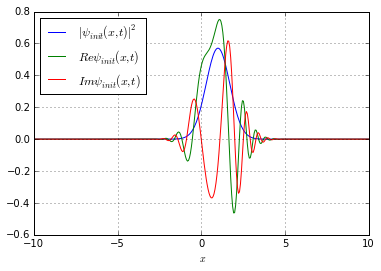

In [38]:
# Initial State in X space

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi0_x) )**2 , label ='$|\psi_{init}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi0_x) )   , label ='$Re\psi_{init}(x , t) $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi0_x) )   ,label = '$Im\psi_{init}(x , t)$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')


## 2. IMAGINARY TIME METHOD: GROUND STATE COMPUTATION 

In [39]:
#----Decaying Propagators factors 

#  Decaying kinetic propagator  , for a full step : dt

kinetic_Decaying= np.exp( (-hbar*K**2*dt)/(2.*mass) )

#  Decaying Potential propagator , for a  full step : dt

potential_Decaying=np.exp( (-Potential(X)*dt)/(hbar) )


In [9]:
Psi_x_Ground=Psi0_x

Iteration = 0
initial_time = time.time()

while True:
      
      Iteration = Iteration + 1 
    
    #--- Save the initial value of Psi_x_Ground in each iteration to compare
    
      Psi_x_G0 = Psi_x_Ground
      
    #---Split Operator Method
    
      #  x --> k
      Psi_k_Ground  = fftpack.fft(Psi_x_Ground )
      Psi_k_Ground *= kinetic_Decaying
        
      # k --> x
      Psi_x_Ground  = fftpack.ifft(Psi_k_Ground )
      Psi_x_Ground *= potential_Decaying
        
    #--- Renormalize Psi_x_Ground
    
      Psi_x_Ground  /= np.sqrt( np.trapz( np.abs(Psi_x_Ground)**2  ,dx=dX ) )
    
    #--- Now we compare the values 
    
      AproxReal = np.sum(   np.abs( np.abs( np.real(Psi_x_Ground) )  -  np.abs( np.real(Psi_x_G0) ) )  )
      AproxImaginary = np.sum(  np.abs(   np.abs( np.imag(Psi_x_Ground) ) - np.abs( np.imag(Psi_x_G0) )  )  )
      
        
      if ( (AproxReal < 1e-15 )  and  (AproxImaginary < 1e-15) ):
        break
        
final_time = time.time() 

print "Total iterations :",Iteration
print 'Computation time to find ground state = ', final_time - initial_time, ' seconds'

    

Total iterations : 711
Computation time to find ground state =  0.116637945175  seconds


In [10]:
# Saving data of Ground state

f = h5py.File("Psi_x_Ground.hdf5", "w")  
f['Psi_x_Ground '] = Psi_x_Ground 
f.close()

### Plotting Ground state finding via numerical methods

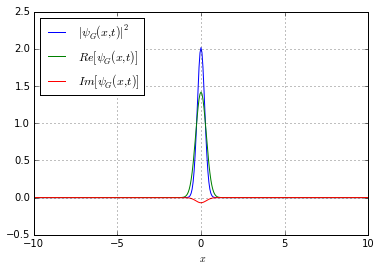

In [40]:
# Plotting Finding Ground state in X_space

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x_Ground ) )**2 , label ='$|\psi_{G}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi_x_Ground ) )   , label ='$Re[\psi_{G}(x , t)] $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi_x_Ground ) )   ,label = '$Im[\psi_{G}(x , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')

In [12]:
# Ground state in K_space

#---Normalization in k space:

norm_k_Ground = np.sqrt( np.trapz( fftpack.fftshift( np.abs(fftpack.fft(Psi_x_Ground))**2  )  ,dx=dK ) )
Psi_k_Ground  = fftpack.fft(Psi_x_Ground)/norm_k_Ground

print 'The renormalized initial state norm (Psi_k_Ground) is : ', \
np.sqrt( np.trapz( np.abs(Psi_k_Ground)**2  ,dx=dK ) )


The renormalized initial state norm (Psi_k_Ground) is :  0.990736403713


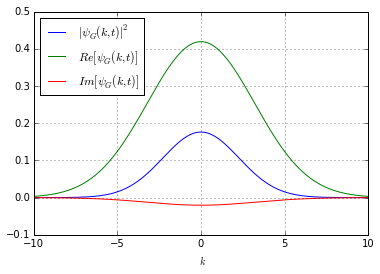

In [41]:
#---Plotting Ground State in K space

plt.plot( fftpack.fftshift( K ), np.abs( fftpack.fftshift(Psi_k_Ground ) )**2 , label ='$|\psi_{G}(k , t)|^2 $')
plt.plot( fftpack.fftshift( K ) , np.real( fftpack.fftshift(Psi_k_Ground ) )   , label ='$Re[\psi_{G}(k , t)] $')
plt.plot( fftpack.fftshift( K ), np.imag( fftpack.fftshift(Psi_k_Ground ) )   ,label = '$Im[\psi_{G}(k , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $k$")
plt.grid('on')
plt.legend(loc='upper left')

### Plotting Theorical Ground state

In [14]:
Psi_x_Ground_Theo =(  mass*omega/(np.pi*hbar)  )**(0.25)*np.exp(-mass*omega*X**2 /(2*hbar) )

# Normalization

Psi_x_Ground_Theo /= np.sqrt( np.trapz( np.abs(Psi_x_Ground_Theo)**2  ,dx=dX ) )

print 'The renormalized initial state norm (Psi_x_Ground_Theo) is ', \
np.sqrt( np.trapz( np.abs(Psi_x_Ground_Theo)**2  ,dx=dX ) )

The renormalized initial state norm (Psi_x_Ground_Theo) is  1.0


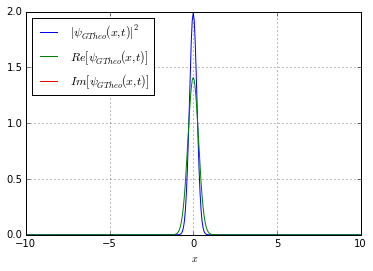

In [42]:
# Plotting Theorical Ground state in X_space

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x_Ground_Theo ) )**2 , label ='$|\psi_{GTheo}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi_x_Ground_Theo ) )   , label ='$Re[\psi_{GTheo}(x , t)] $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi_x_Ground_Theo ) )   ,label = '$Im[\psi_{GTheo}(x , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')

In [16]:
# Theorical Ground state in K_space

#---Normalization in k space:

norm_k_Ground_Theo = np.sqrt( np.trapz( fftpack.fftshift( np.abs(fftpack.fft(Psi_x_Ground_Theo))**2  )  ,dx=dK ) )
Psi_k_Ground_Theo  = fftpack.fft(Psi_x_Ground)/norm_k_Ground_Theo

print 'The renormalized initial state norm (Psi_k_Ground_Theo) is : ', \
np.sqrt( np.trapz( np.abs(Psi_k_Ground_Theo)**2  ,dx=dK ) )

The renormalized initial state norm (Psi_k_Ground_Theo) is :  0.991426260167


In [17]:
#---Plotting Theorical Ground State in K space

plt.plot( fftpack.fftshift( K ), np.abs( fftpack.fftshift(Psi_k_Ground_Theo ) )**2 , label ='$|\psi_{G}(k , t)|^2 $')
plt.plot( fftpack.fftshift( K ) , np.real( fftpack.fftshift(Psi_k_Ground_Theo ) )   , label ='$Re[\psi_{G}(k , t)] $')
plt.plot( fftpack.fftshift( K ), np.imag( fftpack.fftshift(Psi_k_Ground_Theo ) )   ,label = '$Im[\psi_{G}(k , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $k$")
plt.grid('on')
plt.legend(loc='upper left')

### Comparing Theorical Ground state and Ground state finding via numerical methods

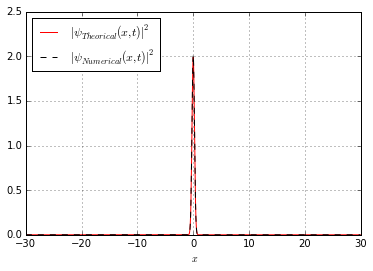

In [43]:
#------X space

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x_Ground_Theo ) )**2 ,'r', label ='$|\psi_{Theorical}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x_Ground ) )**2 ,'k--',label ='$|\psi_{Numerical}(x , t)|^2 $')
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')

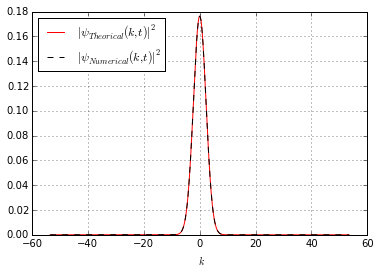

In [44]:
#--- In k space

plt.plot( fftpack.fftshift( K ), np.abs( fftpack.fftshift(Psi_k_Ground_Theo ) )**2 ,'r', label ='$|\psi_{Theorical}(k , t)|^2 $')
plt.plot( fftpack.fftshift( K ), np.abs( fftpack.fftshift(Psi_k_Ground ) )**2 ,'k--',label ='$|\psi_{Numerical}(k , t)|^2 $')
plt.xlabel(" $k$")
plt.grid('on')
plt.legend(loc='upper left')


# 3.SPLIT OPERATOR METHOD

In [20]:
# ---Defining the propagators factors---------------

#  kinetic propagator , for a full step : dt

kineticPropagatorFactor= np.exp( -1j*hbar*K**2*dt/(2.*mass) )

#  Potential propagator , for a  full step : dt

potentialPropagatorFactor=np.exp( -1j*Potential(X)*dt/hbar )


### 3.1 Apply split Operator Method to Ground state finding via Numerical Methods

In [21]:
#----Propagation------------------------------------------------

Psi_x = Psi_x_Ground.copy() 

initial_time = time.time()

for t in range(1,timeSteps):
    
    #  x--> k
      Psi_k  = fftpack.fft(Psi_x)
      Psi_k *= kineticPropagatorFactor
    # k--> x
      Psi_x = fftpack.ifft(Psi_k)  
      Psi_x *= potentialPropagatorFactor  
        
final_time = time.time()

print 'Computation time to compute propagation = ', final_time - initial_time, ' seconds'        
   

Computation time to compute propagation =  45.7362141609  seconds


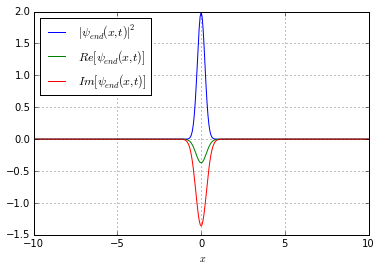

In [45]:
#-----Plotting Final state :

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x ) )**2 , label ='$|\psi_{end}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi_x) )   , label ='$Re[\psi_{end}(x , t)] $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi_x ) )   ,label = '$Im[\psi_{end}(x , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')


### Checking propagation of Ground state finding via numerical methods

In [23]:
plt.plot( fftpack.fftshift(X) , fftpack.fftshift(np.abs(Psi_x_Ground)**2 ) ,'r',label = 'Initial probability')
plt.plot( fftpack.fftshift(X) , fftpack.fftshift( np.abs(Psi_x)**2) ,
         'k--',label = ' Final probability ')

plt.xlim(-10,10)
plt.xlabel("x")
plt.grid('on')
plt.legend(loc='upper left')


In [24]:
print "Max difference beetween  ground state probability before and after the propagation :",\
np.max(np.abs(Psi_x_Ground)**2)-np.max(np.abs(Psi_x)**2)

print "Min difference beetween  ground state probability before and after the propagation :",\
np.min(np.abs(Psi_x_Ground)**2)-np.min(np.abs(Psi_x)**2)

Max difference beetween  ground state probability before and after the propagation : 0.027696950755
Min difference beetween  ground state probability before and after the propagation : -2.7935734214e-30


## 3.2 Apply split Operator Method to theorical Ground state 

In [25]:
#----Propagation------------------------------------------------

Psi_x_Theo = Psi_x_Ground_Theo.copy() 

initial_time = time.time()

for t in range(1,timeSteps):
    
    #  x--> k
      Psi_k_Theo  = fftpack.fft(Psi_x_Theo)
      Psi_k_Theo *= kineticPropagatorFactor
    # k--> x
      Psi_x_Theo = fftpack.ifft(Psi_k_Theo)  
      Psi_x_Theo *= potentialPropagatorFactor  
        
final_time = time.time()

print 'Computation time to compute propagation = ', final_time - initial_time, ' seconds'        
   

Computation time to compute propagation =  45.8195438385  seconds


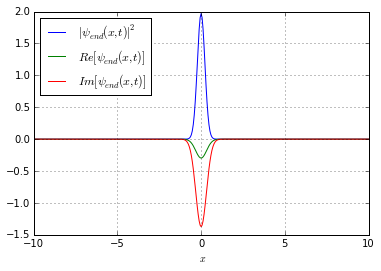

In [46]:
#-----Plotting Final state :

plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_x_Theo ) )**2 , label ='$|\psi_{end}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi_x_Theo) )   , label ='$Re[\psi_{end}(x , t)] $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi_x_Theo ) )   ,label = '$Im[\psi_{end}(x , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')

### Checking propagation of Theorical Ground state 

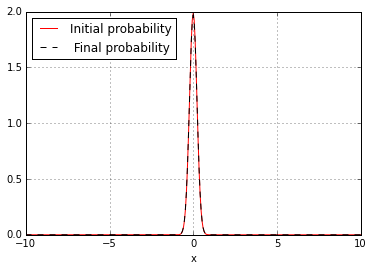

In [47]:
plt.plot( fftpack.fftshift(X) , fftpack.fftshift(np.abs(Psi_x_Ground_Theo)**2 ) ,'r',label = 'Initial probability')
plt.plot( fftpack.fftshift(X) , fftpack.fftshift( np.abs(Psi_x_Theo)**2) ,
         'k--',label = ' Final probability ')

plt.xlim(-10,10)
plt.xlabel("x")
plt.grid('on')
plt.legend(loc='upper left')

In [28]:
print "Max difference beetween  ground state probability before and after the propagation :",\
np.max(np.abs(Psi_x_Ground_Theo)**2)-np.max(np.abs(Psi_x_Theo)**2)

print "Min difference beetween  ground state probability before and after the propagation :",\
np.min(np.abs(Psi_x_Ground_Theo)**2)-np.min(np.abs(Psi_x_Theo)**2)

Max difference beetween  ground state probability before and after the propagation : 0.0187739457092
Min difference beetween  ground state probability before and after the propagation : -1.21304350138e-30


## 4. COHERENTS STATES

In [29]:
# Changing the origin using Shift Fourier Theorem

x_shift = -6.0  # New origin

Psi_Coherent = fftpack.ifft(  np.exp(1j*x_shift*K)*fftpack.fft( Psi_x_Ground_Theo )  )


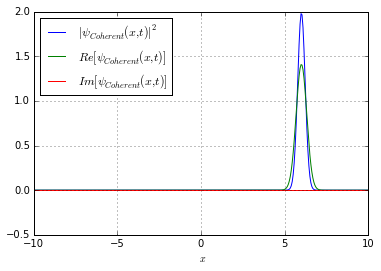

In [48]:
#---Plotting coherent states
plt.plot( fftpack.fftshift( X ), np.abs( fftpack.fftshift(Psi_Coherent ) )**2 , label ='$|\psi_{Coherent}(x , t)|^2 $')
plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift(Psi_Coherent ) )   , label ='$Re[\psi_{Coherent}(x , t)] $')
plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift(Psi_Coherent ) )   ,label = '$Im[\psi_{Coherent}(x , t)]$')
plt.xlim(-10,10)
plt.xlabel(" $x$")
plt.grid('on')
plt.legend(loc='upper left')

### 4.1 Evolution of coherents states

In [31]:
#----Propagation------------------------------------------------

Psi_x_Final_coherent = Psi_Coherent.copy() 

initial_time = time.time()

for t in range(1,timeSteps):
    
    #  x--> k
      Psi_x_Final_coherent  = fftpack.fft(Psi_x_Final_coherent)
      Psi_x_Final_coherent *= kineticPropagatorFactor
    # k--> x
      Psi_x_Final_coherent = fftpack.ifft(Psi_x_Final_coherent)  
      Psi_x_Final_coherent *= potentialPropagatorFactor  
        
final_time = time.time()

print 'Computation time to compute propagation = ', final_time - initial_time, ' seconds'        
   

Computation time to compute propagation =  45.8573329449  seconds
